In [1]:
#匯入模組
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
# 讀取數據
data = pd.read_csv('data/500_Person_Gender_Height_Weight_Index.csv')

In [3]:
# 印出data的資料類型
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print("資料鍵值：",data.keys())
print("資料大小：",data.shape)
print("性別資料：",data.Gender)
print("身高資料：",data.Height)
print("體重資料：",data.Weight)

資料鍵值： Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')
資料大小： (500, 4)
性別資料： 0        Male
1        Male
2      Female
3      Female
4        Male
5        Male
6        Male
7        Male
8        Male
9      Female
10       Male
11     Female
12     Female
13       Male
14       Male
15     Female
16     Female
17       Male
18       Male
19       Male
20       Male
21     Female
22     Female
23       Male
24     Female
25     Female
26       Male
27       Male
28     Female
29       Male
        ...  
470      Male
471      Male
472    Female
473      Male
474    Female
475      Male
476    Female
477      Male
478    Female
479    Female
480    Female
481    Female
482    Female
483      Male
484    Female
485      Male
486    Female
487      Male
488      Male
489    Female
490    Female
491    Female
492    Female
493    Female
494      Male
495    Female
496    Female
497    Female
498      Male
499      Male
Name: Gender, Length: 500, dtype: object
身高資料： 0      17

In [5]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
# 搜尋特定的欄位，列出所有性別、身高、體重欄位(不重複)
Height_Cols = data.drop_duplicates(subset=['Height'],keep='first')
print(Height_Cols['Height'])
print("Height資料大小：",Height_Cols.shape)

Weight_Cols = data.drop_duplicates(subset=['Weight'],keep='first')
print(Weight_Cols['Weight'])
print("Weight資料大小：",Weight_Cols.shape)

0      174
1      189
2      185
3      195
4      149
6      147
7      154
9      169
11     159
12     192
13     155
14     191
15     153
16     157
17     140
18     144
19     172
25     151
26     190
27     187
28     163
29     179
31     178
33     160
36     197
38     171
40     175
43     161
44     182
46     188
47     181
50     168
51     176
54     196
58     164
59     143
61     141
62     193
69     194
73     180
76     165
81     166
83     186
85     198
87     145
91     183
93     177
95     170
96     142
100    199
110    150
111    146
115    148
123    184
124    158
133    167
167    156
180    162
220    173
222    152
Name: Height, dtype: int64
Height資料大小： (60, 4)
0       96
1       87
2      110
3      104
4       61
6       92
7      111
8       90
9      103
10      81
11      80
12     101
13      51
14      79
15     107
17     129
18     145
19     139
21     149
22      97
24      67
25      64
26      95
27      62
28     159
29     152
30     

In [7]:
#印出前5個數據
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [8]:
# 更改Index欄位名稱
data.rename(columns={'Index': 'Type'}, inplace=True)
data.head()

,Gender,Height,Weight,Type
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [9]:
# 針對Type欄位原始數據進行修改(0-Extremely Weak,1-Weak,2-Normal,3-Overweight,4-Obesity,5-Extreme Obesity)
d = {0:'Extremely Weak',1:'Weak',2:'Normal',3:'Overweight',4:'Obesity',5:'Extreme Obesity'}
data = data.replace(d)
print(data)

     Gender  Height  Weight             Type
0      Male     174      96          Obesity
1      Male     189      87           Normal
2    Female     185     110          Obesity
3    Female     195     104       Overweight
4      Male     149      61       Overweight
5      Male     189     104       Overweight
6      Male     147      92  Extreme Obesity
7      Male     154     111  Extreme Obesity
8      Male     174      90       Overweight
9    Female     169     103          Obesity
10     Male     195      81           Normal
11   Female     159      80          Obesity
12   Female     192     101       Overweight
13     Male     155      51           Normal
14     Male     191      79           Normal
15   Female     153     107  Extreme Obesity
16   Female     157     110  Extreme Obesity
17     Male     140     129  Extreme Obesity
18     Male     144     145  Extreme Obesity
19     Male     172     139  Extreme Obesity
20     Male     157     110  Extreme Obesity
21   Femal

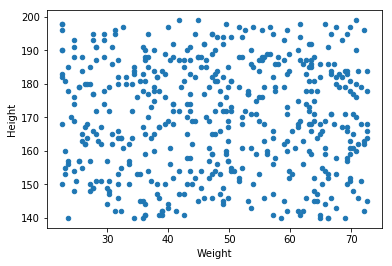

In [10]:
data['Weight'] = data['Weight'].apply(lambda x:0.453592*x)
data.plot.scatter(x='Weight', y='Height')

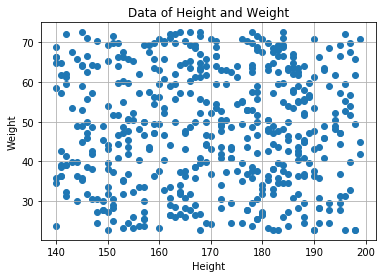

In [11]:
# 身高
x = data['Height']
# 體重
y = data['Weight']
plt.title('Data of Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.scatter(x,y)
plt.show()

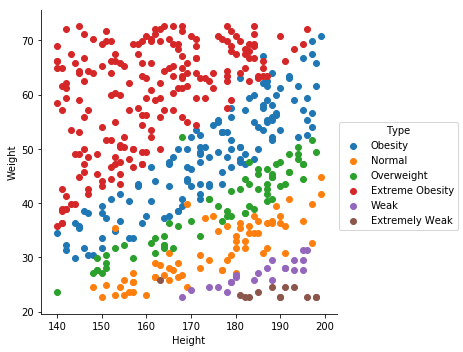

In [12]:
# 看出分類(0-Extremely Weak,1-Weak,2-Normal,3-Overweight,4-Obesity,5-Extreme Obesity)
sns.FacetGrid(data, hue="Type", size=5).map(plt.scatter, "Height", "Weight").add_legend()

In [13]:
X = data[['Weight']].values
y = data['Height'].values

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.000
Intercept: 169.920


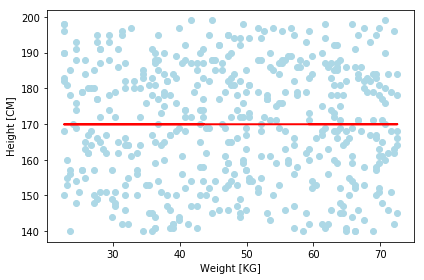

In [14]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

lin_regplot(X, y, slr)
plt.xlabel('Weight [KG]')
plt.ylabel('Height [CM]')
plt.tight_layout()
plt.show()

In [15]:
# 挑選欄位名稱為Type(會有重複)
s = data[['Type']]

# 根據Index每一項進行統計，統計之結果放置在新欄位counts，並以遞減排序方式呈現。
index_count = pd.DataFrame(s.groupby('Type').size().sort_values(ascending=True).rename('counts').reset_index())
index_count.head(6)

,Type,counts
0,Extremely Weak,13
1,Weak,22
2,Overweight,68
3,Normal,69
4,Obesity,130
5,Extreme Obesity,198


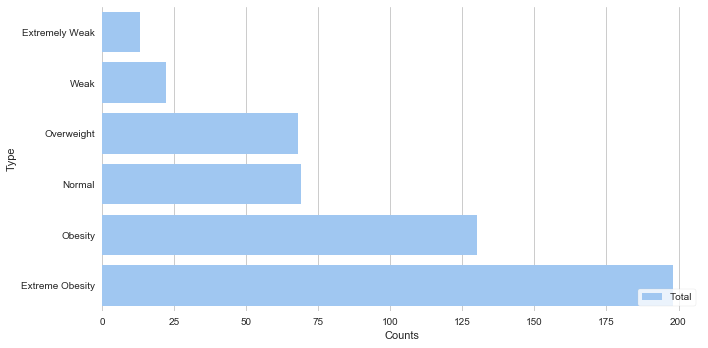

In [16]:
# 指定主題的風格參數
sns.set(style="whitegrid",context='notebook')

# 設置圖表大小
f, ax = plt.subplots(figsize=(10, 5))


# 繪製長條圖(barplot)
sns.set_color_codes("pastel")
# 設定x軸變量為counts,y軸變量為Primary Type。
sns.barplot(x="counts", y="Type", data=index_count, label="Total", color="b")

# 新增圖例和座標軸
# frameon:是否繪製圖像邊緣
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type", xlabel="Counts")
sns.despine(left=True, bottom=True)

# 顯示圖表
plt.tight_layout()
plt.show()

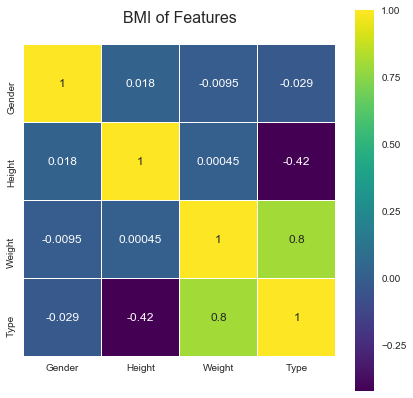

In [17]:
# 將資料數值化
data = pd.read_csv('data/500_Person_Gender_Height_Weight_Index.csv')
# 更改欄位名稱
data.rename(columns={'Index': 'Type'}, inplace=True)
# 針對Index欄位原始數據進行修改(0 - Male,1 - Female)
d = {'Male':0,'Female':1}
data = data.replace(d)

# 分析特徵的兩兩相關
colormap = plt.cm.viridis
plt.figure(figsize=(7,7))
plt.title('BMI of Features', y=1.05, size=16)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

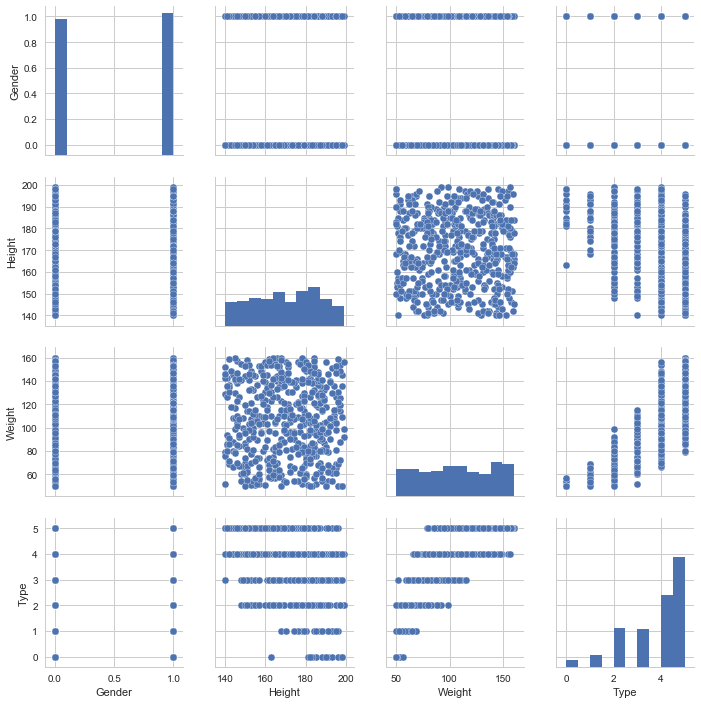

In [18]:
# 分析特徵的兩兩相關
sns.pairplot(data)

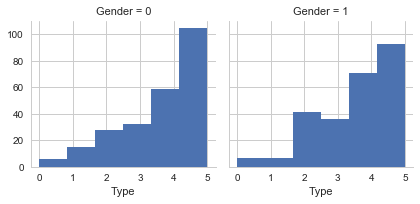

In [19]:
# 依據性別統計各種Type的個數(0-Extremely Weak,1-Weak,2-Normal,3-Overweight,4-Obesity,5-Extreme Obesity)
g = sns.FacetGrid(data, col='Gender')
g.map(plt.hist,'Type', bins=6)
plt.show()

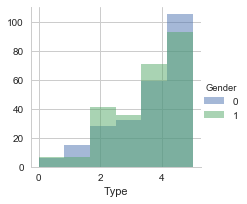

In [20]:
# hue參數的把兩個直方圖畫在同一張圖上，其中有size參數决定高度，aspect長寬比，width=size*aspect
grid = sns.FacetGrid(data, hue='Gender')
grid.map(plt.hist,'Type', alpha=0.5, bins=6)
grid.add_legend()
plt.show()